In [1]:
#import warnings
warnings.filterwarnings('ignore')

In [101]:
#pip install ipython-autotime

Note: you may need to restart the kernel to use updated packages.


In [1]:
#%load_ext autotime

time: 0 ns (started: 2023-05-07 06:40:17 -05:00)


In [4]:
#conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Usuario\anaconda3\envs\MIAD

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       haa95532_0         158 KB  anaconda
    certifi-2022.12.7          |   py39haa95532_0         153 KB  anaconda
    ------------------------------------------------------------
                                           Total:         310 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda None
  certifi                                         pkgs/main --> anaconda None
  openssl              pkgs/main::openssl-1.1.1t-h2bbff1b_0 --> anaconda::openssl-1.1.1s-h2bbff1b_0 None




certifi-2022.12.7    | 153 KB    |            |   0% 
certifi-2022.12.

In [2]:
#conda install seaborn

time: 0 ns (started: 2023-05-07 06:40:31 -05:00)


In [1]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import math

#from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import itertools

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
# Carga de datos de archivos .csv
url = 'SECOP I filtro.txt'
secop1 = pd.read_csv(url, delimiter='|', dtype='str')

# Selecciona las columnas seleccionadas en el preprocesamiento
columnasSeleccionadas = ['UID', #1
                         'Anno Cargue SECOP', #2
                         'Anno Firma Contrato', #3
                         'Nivel Entidad', #4
                         'Orden Entidad', #5
                         'Nombre Entidad', #6
                         'NIT de la Entidad', #7
                         'Código de la Entidad', #8
                         'ID Modalidad', #9
                         'Modalidad de Contratacion', #10
                         'Estado del Proceso', #11
                         'ID Objeto a Contratar', #15
                         'Objeto a Contratar', #16
                         'Detalle del Objeto a Contratar', #17
                         'Municipio de Obtencion', #19
                         'Municipio de Entrega', #20
                         'Numero de Constancia', #23
                         'Numero de Proceso', #24
                         'Numero de Contrato', #25
                         'Cuantia Proceso', #26
                         'ID Grupo', #27
                         'Nombre Grupo', #28
                         'ID Familia', #29
                         'Nombre Familia', #30
                         'ID Clase', #31
                         'Nombre Clase', #32
                         'ID Adjudicacion', #33
                         'Tipo Identifi del Contratista', #34
                         'Identificacion del Contratista', #35
                         'Nom Razon Social Contratista', #36
                         'Dpto y Muni Contratista', #37
                         'Identific Representante Legal', #39
                         'Nombre del Represen Legal', #40
                         'Fecha de Firma del Contrato', #41
                         'Fecha Ini Ejec Contrato', #42
                         'Plazo de Ejec del Contrato', #43
                         'Rango de Ejec del Contrato', #44
                         'Tiempo Adiciones en Dias', #45
                         'Tiempo Adiciones en Meses', #46
                         'Fecha Fin Ejec Contrato', #47
                         'Cuantia Contrato', #49
                         'Valor Total de Adiciones', #50
                         'Valor Contrato con Adiciones', #51
                         'Objeto del Contrato a la Firma', #52
                         'Proponentes Seleccionados', #53
                         'Calificacion Definitiva', #54
                         'Es PostConflicto', #59
                         'Municipio Entidad', #67
                         'Departamento Entidad', #68
                         'Ultima Actualizacion', #69
                         'Fecha Liquidacion', #70
                         'Cumple Decreto 248', #71
                         'IncluyeBienesDecreto248' #72
                         ]


# Imputa valores NA
secop1['Fecha Ini Ejec Contrato'] = secop1['Fecha Ini Ejec Contrato'].fillna(secop1['Fecha de Cargue en el SECOP'])
#secop1['Cuantía Contrato'] = secop1['Cuantía Contrato'].fillna(secop1['Cuantía Proceso'])

# Cambia el tipo de las columnas numericas
columnasNumero = ['Cuantia Proceso', #26
                  'Plazo de Ejec del Contrato', #43
                  'Tiempo Adiciones en Dias', #45 ? sobra
                  'Tiempo Adiciones en Meses', #46 ? sobra
                  'Cuantia Contrato', #49
                  'Valor Total de Adiciones', #50 ? sobra
                  'Valor Contrato con Adiciones' #51 ? sobra
                  ]
secop1[columnasNumero] = secop1[columnasNumero].astype('int64')

# Convierte a formato fecha
#secop1['Ultima Actualizacion'] = pd.to_datetime(secop1['Ultima Actualizacion'], format='%d/%m/%Y')
secop1['Fecha Ini Ejec Contrato'] = pd.to_datetime(secop1['Fecha Ini Ejec Contrato'], format='%d/%m/%Y')
# Extrae año y mes
secop1['Anno Ini Ejec Contrato'] = secop1['Fecha Ini Ejec Contrato'].dt.year
secop1['Mes Ini Ejec Contrato'] = secop1['Fecha Ini Ejec Contrato'].dt.month

# Convierte años de 0 a 4 segun su posicion en cuetrenios desde 2016
secop1['Anno Ini Ejec Contrato'] = (secop1['Anno Ini Ejec Contrato']-2016)%4


# Crea Prorroga y Adicion
#secop1['Prorroga'] = secop1['Tiempo Adiciones en Dias'].apply(lambda x: 'Prorrogado' if x != 0 else 'No Prorrogado')
secop1['Prorroga'] = secop1['Tiempo Adiciones en Dias'] + secop1['Tiempo Adiciones en Meses']
secop1['Prorroga'] = secop1['Prorroga'].apply(lambda x: 1 if x != 0 else 0)
#secop1['Adicion'] = secop1['Valor Total de Adiciones'].apply(lambda x: 'Adicionado' if x != 0 else 'No Adicionado')
secop1['Adicion'] = secop1['Valor Total de Adiciones'].apply(lambda x: 1 if x != 0 else 0)


# Selecciona las columnas seleccionadas en el feature engineering
columnasSeleccionadas = ['Orden Entidad', #5
                         'Modalidad de Contratacion', #10
                         'Estado del Proceso', #11 adicional
                         #'Nombre Regimen de Contratacion', #14 ? igual que modalidad
                         'Objeto a Contratar', #16
                         'Municipio de Obtencion', #19
                         #'Anno de Cargue en el SECOP', #22 ?
                         #'Mes de Cargue en el SECOP', #22 ?
                         'Cuantia Proceso', #26
                         'Nombre Grupo', #28
                         'Tipo Identifi del Contratista', #34
                         'Dpto y Muni Contratista', #37
                         'Anno Ini Ejec Contrato', #42
                         'Mes Ini Ejec Contrato', # 42
                         'Plazo de Ejec del Contrato', #43
                         'Rango de Ejec del Contrato', #44
                         'Prorroga', #45 y 46
                         'Tiempo Adiciones en Dias', #45 ? perdida de informacion
                         'Tiempo Adiciones en Meses', #46 ? perdida de informacion
                         'Cuantia Contrato', #49
                         'Adicion', #50
                         'Valor Total de Adiciones', #50 ? sobra
                         'Valor Contrato con Adiciones', #51 ? sobra
                         #'Proponentes Seleccionados', #53
                         'Departamento Entidad' #68
                         ]

secop1 = secop1[columnasSeleccionadas]

# Codificar las columnas categoricas
#secop1['Nivel Entidad'] = pd.factorize(secop1['Nivel Entidad'])[0]
secop1['Orden Entidad'] = pd.factorize(secop1['Orden Entidad'])[0] #5
secop1['Modalidad de Contratacion'] = pd.factorize(secop1['Modalidad de Contratacion'])[0] #10
secop1['Estado del Proceso'] = pd.factorize(secop1['Estado del Proceso'])[0] #11
secop1['Municipio de Obtencion'] = pd.factorize(secop1['Municipio de Obtencion'])[0] #11
secop1['Nombre Grupo'] = pd.factorize(secop1['Nombre Grupo'])[0] #28
secop1['Tipo Identifi del Contratista'] = pd.factorize(secop1['Tipo Identifi del Contratista'])[0] #34
secop1['Dpto y Muni Contratista'] = pd.factorize(secop1['Dpto y Muni Contratista'])[0] #37
secop1['Rango de Ejec del Contrato'] = pd.factorize(secop1['Rango de Ejec del Contrato'])[0] #44
#secop1['Municipio Entidad'] = pd.factorize(secop1['Municipio Entidad'])[0]
secop1['Departamento Entidad'] = pd.factorize(secop1['Departamento Entidad'])[0] #68
#secop1['Prorroga'] = pd.factorize(secop1['Prorroga'])[0]
#secop1['Adicion'] = pd.factorize(secop1['Adicion'])[0]

# Eliminación filas con observaciones nulas
#secop1.dropna(inplace=True)
#secop1.head()

In [5]:
secop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135821 entries, 0 to 135820
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Orden Entidad                  135821 non-null  int64 
 1   Modalidad de Contratacion      135821 non-null  int64 
 2   Estado del Proceso             135821 non-null  int64 
 3   Objeto a Contratar             135821 non-null  object
 4   Municipio de Obtencion         135821 non-null  int64 
 5   Cuantia Proceso                135821 non-null  int64 
 6   Nombre Grupo                   135821 non-null  int64 
 7   Tipo Identifi del Contratista  135821 non-null  int64 
 8   Dpto y Muni Contratista        135821 non-null  int64 
 9   Anno Ini Ejec Contrato         135821 non-null  int64 
 10  Mes Ini Ejec Contrato          135821 non-null  int64 
 11  Plazo de Ejec del Contrato     135821 non-null  int64 
 12  Rango de Ejec del Contrato     135821 non-nu

In [6]:
# Selección de variables predictoras para Prorroga
feature_cols = ['Orden Entidad',
                'Modalidad de Contratacion',
                'Estado del Proceso',
                #'Objeto a Contratar',
                'Municipio de Obtencion',
                'Cuantia Proceso',
                'Nombre Grupo',
                'Tipo Identifi del Contratista',
                'Dpto y Muni Contratista',
                'Anno Ini Ejec Contrato',
                'Mes Ini Ejec Contrato',
                'Plazo de Ejec del Contrato',
                'Rango de Ejec del Contrato',
                #'Prorroga',
                #'Tiempo Adiciones en Dias',
                #'Tiempo Adiciones en Meses',
                'Cuantia Contrato',
                #'Adicion',
                #'Valor Total de Adiciones',
                #'Valor Contrato con Adiciones',
                'Departamento Entidad'
                ]

# Separación de variables predictoras (X) y variable de interes (y)
#secop1sample = secop1.sample(30000) # Se incia con un sample de 20k de los 135k registros
X = secop1[feature_cols]
y = (secop1['Prorroga'])

# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40, stratify=y)
print('Train:', y_train.shape[0], '\ny_train:')
print(y_train.value_counts())
print('\nTest:', y_test.shape[0], '\ny_test:')
print(y_test.value_counts())

Train: 91000 
y_train:
0    81195
1     9805
Name: Prorroga, dtype: int64

Test: 44821 
y_test:
0    39992
1     4829
Name: Prorroga, dtype: int64


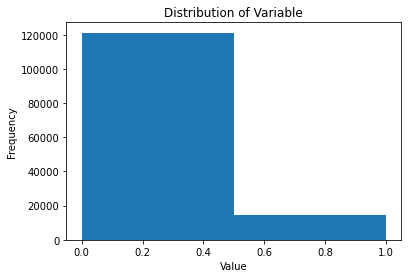

In [7]:
plt.hist(secop1['Prorroga'], bins=2)  # Create a histogram with 10 bins
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Variable')
plt.show()

In [26]:
# Funcion para mostrar los resultados
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    ConfusionMatrixDisplay(conf_matrix).plot()
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

time: 0 ns (started: 2023-05-07 06:59:54 -05:00)


# XGB Regressor Calibration Full

## Paso 0 : Definición inicial de Parámetros

In [35]:
base_score = None
booster = None
colsample_bylevel = None
colsample_bynode = None
enable_categorical = False
importance_type=None
interaction_constraints=None
max_delta_step=None

objective = 'binary:logistic'
eval_metric = "logloss"

learning_rate=None
max_depth = 6
n_estimators=100
colsample_bytree = 1
gamma = 0
min_child_weight = 1
reg_alpha=None
reg_lambda=None
subsample = 1

random_state=1
silent = 0
seed = 0
verbosity=0

time: 0 ns (started: 2023-05-07 07:07:46 -05:00)


## Paso 1: Calibración de max_depth y min_child_weight

In [36]:
parameters = {}
parameters['max_depth'] = max_depth
parameters['min_child_weight']= min_child_weight
parameters['gamma'] = gamma
parameters['subsample']= subsample
parameters['colsample_bytree']= colsample_bytree
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
parameters['learning_rate'] = learning_rate
parameters['n_estimators'] = n_estimators

scores = []

cv_params = {'max_depth':range(3,10,2),  # Valor entre 3 y 10.
             'min_child_weight': [1,3,5]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                        
                                    ),
                    
                    param_grid = cv_params,
                    scoring = 'recall',
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([1.15705996, 1.18284388, 1.13045416, 1.83755164, 1.83181186,
       1.8819653 , 2.72040544, 2.57517929, 2.55957608, 3.60041018,
       3.36095591, 3.30776305]), 'std_fit_time': array([0.08097079, 0.06143118, 0.01760384, 0.01440753, 0.02364942,
       0.06642649, 0.05398277, 0.03692766, 0.01946709, 0.13449558,
       0.05807315, 0.0246049 ]), 'mean_score_time': array([0.01240253, 0.01190505, 0.01220274, 0.01480546, 0.01360297,
       0.01360297, 0.01660376, 0.01600366, 0.0158031 , 0.01880393,
       0.01780391, 0.01700373]), 'std_score_time': array([0.00149647, 0.00215305, 0.00074852, 0.00074915, 0.00080007,
       0.00149634, 0.00120025, 0.0012652 , 0.00097986, 0.00312491,
       0.00074839, 0.00063286]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_ch

### Estable óptimos temporales max_depth y min_child_weight

In [37]:
max_depth = gbm.best_params_['max_depth']
min_child_weight = gbm.best_params_['min_child_weight']
parameters['max_depth'] = max_depth
parameters['min_child_weight'] = min_child_weight
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 07:10:07 -05:00)


### Calibración de max_depth y min_child_weight con grilla detallada

In [38]:
cv_params = {'max_depth': [max_depth-1, max_depth, max_depth+1], 
             'min_child_weight': [min_child_weight-1, min_child_weight-0.5, min_child_weight, min_child_weight+0.5, min_child_weight+1]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([3.20132065, 3.11350098, 3.09157586, 3.09903827, 3.05803018,
       3.66350183, 3.66813464, 3.62301559, 3.53199477, 3.51218991,
       4.21594934, 4.08436399, 4.07731824, 3.88467498, 3.78357735]), 'std_fit_time': array([0.03898373, 0.03344668, 0.06680628, 0.0754084 , 0.02275133,
       0.03856381, 0.13566904, 0.06630387, 0.06538831, 0.1576247 ,
       0.08146605, 0.0698593 , 0.070297  , 0.06043732, 0.04161161]), 'mean_score_time': array([0.01780319, 0.01660285, 0.01700363, 0.01720428, 0.01920462,
       0.017803  , 0.01980352, 0.0200036 , 0.01980419, 0.02020416,
       0.02460465, 0.01968737, 0.0230042 , 0.0196032 , 0.01960363]), 'std_score_time': array([0.00213642, 0.00049054, 0.00141479, 0.00074839, 0.00203997,
       0.00116656, 0.00278595, 0.00228067, 0.00263912, 0.00213643,
       0.00441111, 0.00210939, 0.00807692, 0.00174414, 0.00079955]), 'param_max_depth': masked_array(data=[8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10],
             mask=[False, Fa

### Estable óptimos definitivos max_depth y min_child_weight

In [39]:
max_depth = gbm.best_params_['max_depth']
min_child_weight = gbm.best_params_['min_child_weight']
parameters['max_depth'] = max_depth
parameters['min_child_weight'] = min_child_weight
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 07:14:42 -05:00)


## Paso 2: Calibración de Parámetro Gamma

In [40]:
cv_params = {'gamma': [i/10.0 for i in range(1,10,2)]}

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state                                        
                                    ),
                   
                    param_grid = cv_params,
                    scoring = 'recall',
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([4.01799073, 4.02590714, 3.97112637, 4.03619146, 3.91728215]), 'std_fit_time': array([0.04919389, 0.0419138 , 0.04617672, 0.13347109, 0.13108435]), 'mean_score_time': array([0.01860318, 0.01940265, 0.01900229, 0.02040286, 0.01860328]), 'std_score_time': array([0.00149694, 0.00174387, 0.00126456, 0.00101999, 0.00080023]), 'param_gamma': masked_array(data=[0.1, 0.3, 0.5, 0.7, 0.9],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'gamma': 0.1}, {'gamma': 0.3}, {'gamma': 0.5}, {'gamma': 0.7}, {'gamma': 0.9}], 'split0_test_score': array([0.35900051, 0.36155023, 0.3600204 , 0.34982152, 0.35339113]), 'split1_test_score': array([0.35594085, 0.3554309 , 0.36308006, 0.35696073, 0.34064253]), 'split2_test_score': array([0.3890872 , 0.38041815, 0.37327894, 0.38041815, 0.39112698]), 'split3_test_score': array([0.37939827, 0.36970933, 0.37429883, 0.36511984, 0.35084141]), 'split4_test_score': array([0.363590

### Estable óptimos temporales gamma

In [41]:
gamma = gbm.best_params_['gamma']
parameters['gamma'] = gamma
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 07:16:27 -05:00)


In [44]:
### Calibración de gamma con grilla detallada

time: 0 ns (started: 2023-05-07 07:18:04 -05:00)


In [45]:
cv_params = {'gamma': [gamma-1, gamma-0.5, gamma, gamma+0.5, gamma+1]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([0.02180471, 0.02180514, 2.2691102 , 2.32039108, 2.33352499]), 'std_fit_time': array([0.00040014, 0.00116681, 0.03285052, 0.11697811, 0.06582674]), 'mean_score_time': array([0.        , 0.        , 0.01560354, 0.01660371, 0.01700363]), 'std_score_time': array([0.        , 0.        , 0.00205956, 0.00149698, 0.0017892 ]), 'param_gamma': masked_array(data=[-0.9, -0.4, 0.1, 0.6, 1.1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'gamma': -0.9}, {'gamma': -0.4}, {'gamma': 0.1}, {'gamma': 0.6}, {'gamma': 1.1}], 'split0_test_score': array([       nan,        nan, 0.29780724, 0.30800612, 0.31208567]), 'split1_test_score': array([       nan,        nan, 0.31463539, 0.31259561, 0.31616522]), 'split2_test_score': array([       nan,        nan, 0.33809281, 0.32942376, 0.32942376]), 'split3_test_score': array([       nan,        nan, 0.3309536 , 0.3309536 , 0.33248343]), 'split4_test_score': array([    

In [46]:
gamma = gbm.best_params_['gamma']
parameters['gamma'] = gamma
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 07:18:47 -05:00)


### Establece el óptimo definitivo de gamma

## Paso 3: Calibración de parámetros subsample y colsample_bytree

In [47]:
cv_params = {'subsample': [i/10.0 for i in range(6,11)],
             'colsample_bytree': [i/10.0 for i in range(6,11)]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = 'recall',
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([3.61424465, 3.40796757, 3.52479329, 3.717837  , 3.19431896,
       3.43597322, 3.56420202, 3.65202203, 3.63601809, 3.26227536,
       3.59160805, 3.66242461, 3.70397162, 3.76444721, 3.5101903 ,
       3.69026322, 3.82454085, 3.90767961, 3.93268533, 3.63275928,
       4.26656003, 4.29920917, 4.30611577, 4.32897429, 3.94572244]), 'std_fit_time': array([0.22725189, 0.02823044, 0.14005001, 0.05999355, 0.05256502,
       0.04856352, 0.04370193, 0.07254288, 0.03280619, 0.03924204,
       0.07966063, 0.05600426, 0.04639415, 0.08969852, 0.05788755,
       0.07238459, 0.08644111, 0.04548742, 0.05980131, 0.06574426,
       0.04194557, 0.10838106, 0.0862797 , 0.08291363, 0.02993893]), 'mean_score_time': array([0.02060432, 0.02320442, 0.02240481, 0.02347808, 0.02360492,
       0.02160463, 0.02660561, 0.01960387, 0.01900411, 0.01920362,
       0.02040443, 0.01860347, 0.01860356, 0.01900382, 0.01920395,
       0.01980391, 0.01880355, 0.02100434, 0.01940374, 0.0194037 ,
     

### Estable óptimos temporales subsample y colsample_bytree

In [48]:
colsample_bytree = gbm.best_params_['colsample_bytree']
subsample = gbm.best_params_['subsample']
parameters['colsample_bytree'] = colsample_bytree
parameters['subsample'] = subsample
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 07:26:42 -05:00)


### Calibración de subsample y colsample_bytree con grilla detallada

In [49]:
cv_params = {'subsample': [i/100.0 for i in range(int((subsample-0.1)*100.0), min(int((subsample+0.1)*100),105) , 5)],
             'colsample_bytree': [i/100.0 for i in range(int((colsample_bytree-0.1)*100.0), min(int((colsample_bytree+0.1)*100),105), 5)]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)
print("max_depth and min_child_weight parameters tuned! moving on to refinement")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([3.59255347, 3.60490193, 3.67782779, 3.67442698, 3.67452335,
       3.74652162, 3.91208835, 3.8454072 , 4.01563563, 4.08360338,
       4.19488544, 4.15588012]), 'std_fit_time': array([0.1004223 , 0.0457986 , 0.07045156, 0.03488825, 0.05546002,
       0.04695076, 0.15211299, 0.07313138, 0.06363221, 0.07484285,
       0.0888887 , 0.05570284]), 'mean_score_time': array([0.02000399, 0.01960406, 0.01940384, 0.01940379, 0.02060404,
       0.019204  , 0.02020397, 0.02180429, 0.02020397, 0.02040424,
       0.01880379, 0.0200038 ]), 'std_score_time': array([0.00089458, 0.0008003 , 0.00049035, 0.00080009, 0.00233312,
       0.0003999 , 0.00132703, 0.00318835, 0.00278634, 0.00338302,
       0.00074832, 0.00126527]), 'param_colsample_bytree': masked_array(data=[0.9, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95, 0.95, 1.0, 1.0,
                   1.0, 1.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fi

### Estable óptimos definitivos subsample y colsample_bytree

In [50]:
colsample_bytree = gbm.best_params_['colsample_bytree']
subsample = gbm.best_params_['subsample']
parameters['colsample_bytree'] = colsample_bytree
parameters['subsample'] = subsample
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 07:30:39 -05:00)


## Paso 4: Calibración de parámetros reg_alpha y reg_lambda

In [51]:
cv_params = {'reg_alpha': [i/10.0 for i in range(1,10,2)], 
             'reg_lambda': [i/10.0 for i in range(1,10,2)]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        colsample_bytree = colsample_bytree,
                                        subsample = subsample,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([4.3331759 , 4.16853976, 4.06225572, 4.11847167, 4.08791995,
       4.1111258 , 4.10872488, 4.15938077, 4.18268552, 4.18583035,
       4.16119099, 4.19914489, 4.05791349, 4.05639296, 4.09441295,
       4.1081243 , 4.1971446 , 4.23375297, 4.28682446, 4.13573103,
       4.0828619 , 4.10872488, 4.23483195, 4.39838982, 4.55106354]), 'std_fit_time': array([0.3573576 , 0.03672337, 0.07571465, 0.09490644, 0.03765406,
       0.09233249, 0.05574553, 0.03380677, 0.04912351, 0.03128059,
       0.08959389, 0.11621103, 0.03737676, 0.05879563, 0.0510867 ,
       0.05750478, 0.11754646, 0.12236372, 0.1261022 , 0.08657178,
       0.05121522, 0.03809437, 0.14640796, 0.33923982, 0.38799112]), 'mean_score_time': array([0.02100415, 0.02200451, 0.0200038 , 0.01940413, 0.0198041 ,
       0.02000356, 0.02000408, 0.02080445, 0.0204042 , 0.02180429,
       0.02100391, 0.02040396, 0.01960387, 0.01840363, 0.01880336,
       0.02200451, 0.02020402, 0.02027307, 0.02340484, 0.01900334,
     

### Estable óptimos temporales reg_alpha y reg_lambda

In [52]:
reg_alpha = gbm.best_params_['reg_alpha']
reg_lambda = gbm.best_params_['reg_lambda']
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 07:39:29 -05:00)


### Calibración de reg_alpha y reg_lambda con grilla detallada

In [53]:
cv_params = {'reg_lambda': [reg_lambda-1, reg_lambda-0.5, reg_lambda, reg_lambda+0.5, reg_lambda+1], 
             'reg_alpha': [reg_alpha-1, reg_alpha-0.5, reg_alpha, reg_alpha+0.5, reg_alpha+1]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        colsample_bytree = colsample_bytree,
                                        subsample = subsample,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([0.02100472, 0.02100487, 0.02100463, 0.02220507, 0.0230051 ,
       0.02140493, 0.0220048 , 4.19774818, 4.17153864, 4.16653771,
       0.021805  , 0.02160492, 4.17093897, 4.20892062, 4.20738449,
       0.02080464, 0.02020445, 4.29010816, 4.3061121 , 4.21634903,
       0.02100468, 0.02120476, 4.25635772, 4.22909203, 4.19438682]), 'std_fit_time': array([0.00089484, 0.0010955 , 0.000895  , 0.00074847, 0.00178947,
       0.00049031, 0.00063271, 0.08319803, 0.04525439, 0.06587089,
       0.00097995, 0.00102003, 0.05323958, 0.07169532, 0.06589807,
       0.00040042, 0.00074842, 0.0709837 , 0.14523829, 0.0828161 ,
       0.00089468, 0.00039992, 0.07182597, 0.05834332, 0.06443962]), 'mean_score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01934528, 0.02240448, 0.02060442,
       0.        , 0.        , 0.01980371, 0.02200413, 0.01880374,
       0.        , 0.        , 0.02020378, 0.01860356, 0.0204041 ,
     

### Estable óptimos definitivosreg_alpha y reg_lambda

In [54]:
reg_alpha = gbm.best_params_['reg_alpha']
reg_lambda = gbm.best_params_['reg_lambda']
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 07:43:50 -05:00)


## Revisión de Parámetros y Primera Predicción

In [55]:
# Funcion para mostrar los resultados
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    ConfusionMatrixDisplay(conf_matrix).plot()
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

time: 0 ns (started: 2023-05-07 07:43:50 -05:00)


In [56]:
print(parameters)
print(scores)

{'max_depth': 10, 'min_child_weight': 0.5, 'gamma': 1.1, 'subsample': 0.5, 'colsample_bytree': 1.0, 'reg_alpha': 0.9, 'reg_lambda': 0.3, 'learning_rate': None, 'n_estimators': 100}
[0.355532891381948, 0.36359000509943906, 0.3694033656297807, 0.32044875063742984, 0.37746047934727184, 0.3790922998470168, 0.3842937276899541, 0.3842937276899541]
time: 0 ns (started: 2023-05-07 07:43:50 -05:00)


Recall en el conjunto de prueba: 0.37088424104369433


<Figure size 432x432 with 0 Axes>

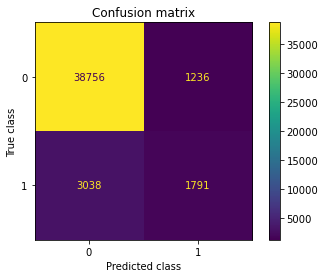

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     39992
           1       0.59      0.37      0.46      4829

    accuracy                           0.90     44821
   macro avg       0.76      0.67      0.70     44821
weighted avg       0.89      0.90      0.89     44821

Mejores parámetros del modelo: {'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1.0, 'enable_categorical': False, 'gamma': 1.1, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 0.5, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 12, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 1, 'reg_alpha': 0.9, 'reg_lambda': 0.3, 'scale_pos_weight': 1, 'subsample': 0.5, 'tree_method': 'exact', 'validate_paramet

In [57]:
# Importación y definición de modelo XGBRegressor
xgbPrimer = XGBClassifier(
     objective = objective,
     seed = seed,
     n_estimators = n_estimators,
     max_depth = max_depth,
     min_child_weight = min_child_weight,
     learning_rate = learning_rate,
     gamma = gamma,
     subsample = subsample,
     colsample_bytree = colsample_bytree,
     reg_alpha = reg_alpha,
     reg_lambda = reg_lambda,
     silent = False,
     eval_metric = eval_metric,
     random_state=random_state
    
 )

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
xgbPrimer.fit(X_train, y_train)
y_pred_primer = xgbPrimer.predict(X_test)


#Imprimir Resultados
test_score = recall_score(y_test, y_pred_primer)
print('Recall en el conjunto de prueba:', test_score)
mostrar_resultados(y_test, y_pred_primer)

# Imprimir los mejores hiperparámetros y los parámetros correspondientes del modelo
print('Mejores parámetros del modelo:', xgbPrimer.get_params())

In [58]:
y_pred_primer

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

time: 0 ns (started: 2023-05-07 07:43:56 -05:00)


## Paso 5: Calibración parametros learning_rate y n_estimators

In [59]:
cv_params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
             'n_estimators': [50, 100, 200]
}

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        colsample_bytree = colsample_bytree,
                                        subsample = subsample,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([2.02865677, 3.94188733, 7.76167779, 2.03605828, 3.93416243,
       7.9517889 , 2.03545861, 4.14273243, 8.35207944, 2.09127092,
       3.99609952, 8.18824449, 2.0466609 , 4.12447729, 8.23030605,
       2.07756853, 4.09396234, 8.11456809]), 'std_fit_time': array([0.02754824, 0.05271098, 0.08830118, 0.0410684 , 0.04672712,
       0.0856863 , 0.01618985, 0.10617741, 0.04783299, 0.03604903,
       0.06083248, 0.07293335, 0.0170024 , 0.06881927, 0.10582899,
       0.03132136, 0.07010394, 0.09310375]), 'mean_score_time': array([0.01480274, 0.02060404, 0.02980604, 0.01380258, 0.01760349,
       0.02920599, 0.01460266, 0.02040415, 0.03060594, 0.01460276,
       0.01960363, 0.03240657, 0.01420259, 0.01940341, 0.03220663,
       0.01360235, 0.01880355, 0.02920566]), 'std_score_time': array([0.0019395 , 0.00162517, 0.00074869, 0.00074815, 0.0008    ,
       0.00160066, 0.0013568 , 0.00135685, 0.00149695, 0.00135679,
       0.00287129, 0.00174385, 0.00160038, 0.00102004, 0.

### Establece óptimos temporales para learning_rate y n_estimators

In [60]:
learning_rate = gbm.best_params_['learning_rate']
n_estimators = gbm.best_params_['n_estimators']
parameters['learning_rate'] = learning_rate
parameters['n_estimators'] = n_estimators
scores.append(gbm.best_score_)

time: 15 ms (started: 2023-05-07 07:51:14 -05:00)


In [61]:
### Calibración de learning_rate y n_estimators

time: 0 ns (started: 2023-05-07 07:51:14 -05:00)


In [62]:
cv_params = {'learning_rate': [learning_rate*0.2, learning_rate*0.5, learning_rate, learning_rate*2, learning_rate*5],
             'n_estimators': [(n_estimators*3/4), n_estimators, n_estimators*5/4]
             
            }           
gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        colsample_bytree = colsample_bytree,
                                        subsample = subsample,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([0.02200513, 8.05603962, 0.02160482, 0.02040448, 7.9306088 ,
       0.02120485, 0.02060452, 8.00468965, 0.02120481, 0.02120471,
       7.97235732, 0.02360544, 0.02360516, 7.82243176, 0.02160463]), 'std_fit_time': array([0.00141435, 0.12127682, 0.0010199 , 0.00049015, 0.09112732,
       0.00040011, 0.00049   , 0.0503772 , 0.00074843, 0.00116683,
       0.05904194, 0.00102001, 0.00049002, 0.05072736, 0.00079994]), 'mean_score_time': array([0.        , 0.03080606, 0.        , 0.        , 0.03320699,
       0.        , 0.        , 0.03100619, 0.        , 0.        ,
       0.03231001, 0.        , 0.        , 0.03400702, 0.        ]), 'std_score_time': array([0.        , 0.00204006, 0.        , 0.        , 0.0054564 ,
       0.        , 0.        , 0.0016738 , 0.        , 0.        ,
       0.00591332, 0.        , 0.        , 0.005587  , 0.        ]), 'param_learning_rate': masked_array(data=[0.06, 0.06, 0.06, 0.15, 0.15, 0.15, 0.3, 0.3, 0.3, 0.6,
                   

### Establece óptimos definitivos para learning_rate y n_estimators

In [63]:
learning_rate = gbm.best_params_['learning_rate']
n_estimators = gbm.best_params_['n_estimators']
parameters['learning_rate'] = learning_rate
parameters['n_estimators'] = n_estimators
scores.append(gbm.best_score_)

time: 0 ns (started: 2023-05-07 07:54:44 -05:00)


In [64]:
print(parameters)
print(scores)

{'max_depth': 10, 'min_child_weight': 0.5, 'gamma': 1.1, 'subsample': 0.5, 'colsample_bytree': 1.0, 'reg_alpha': 0.9, 'reg_lambda': 0.3, 'learning_rate': 1.5, 'n_estimators': 200}
[0.355532891381948, 0.36359000509943906, 0.3694033656297807, 0.32044875063742984, 0.37746047934727184, 0.3790922998470168, 0.3842937276899541, 0.3842937276899541, 0.39092299847016826, 0.4227434982151964]
time: 0 ns (started: 2023-05-07 07:54:45 -05:00)


Recall en el conjunto de prueba: 0.3715054876786084


<Figure size 432x432 with 0 Axes>

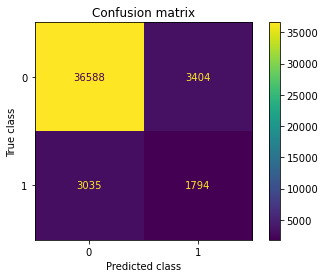

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     39992
           1       0.35      0.37      0.36      4829

    accuracy                           0.86     44821
   macro avg       0.63      0.64      0.64     44821
weighted avg       0.86      0.86      0.86     44821

Mejores parámetros del modelo: {'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1.0, 'enable_categorical': False, 'gamma': 1.1, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 1.5, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 0.5, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 200, 'n_jobs': 12, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 1, 'reg_alpha': 0.9, 'reg_lambda': 0.3, 'scale_pos_weight': 1, 'subsample': 0.5, 'tree_method': 'exact', 'validate_parameters': 1,

In [65]:
# Importación y definición de modelo XGBRegressor
xgbsegundo = XGBClassifier(
     objective = objective,
     seed = seed,
     n_estimators = n_estimators,
     max_depth = max_depth,
     min_child_weight = min_child_weight,
     learning_rate = learning_rate,
     gamma = gamma,
     subsample = subsample,
     colsample_bytree = colsample_bytree,
     reg_alpha = reg_alpha,
     reg_lambda = reg_lambda,
     silent = False,
     eval_metric = eval_metric,
     random_state=random_state
 )

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
xgbsegundo.fit(X_train, y_train)
y_pred_segundo = xgbsegundo.predict(X_test)

#Imprimir Resultados
test_score_segundo = recall_score(y_test, y_pred_segundo)
print('Recall en el conjunto de prueba:', test_score_segundo)
mostrar_resultados(y_test, y_pred_segundo)

# Imprimir los mejores hiperparámetros y los parámetros correspondientes del modelo
print('Mejores parámetros del modelo:', xgbsegundo.get_params())